In [5]:
%pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 1.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.0/11.1 MB 1.4 MB/s eta 0:00:08
   ---- ----------------------------------- 1.3/11.1 MB 1.5 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.1 MB 1.5 MB/s eta 0:00:06
   ------- -------------------------------- 2.1/11.1 MB 1.6 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.1 MB 1.6 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.6 MB/s eta 0:00:06
   ------------ --------------------------- 3.4/11.1 MB 1.7 MB/s eta 0:00:05
   -------------- ------------------------

In [6]:
import pandas as pd
import numpy as np

# === Train set ===
df_LTrain_x = pd.read_csv('arkomadataset/LeftArmDataset/LTrain_x.csv')
df_LTrain_y = pd.read_csv('arkomadataset/LeftArmDataset/LTrain_y.csv')

# === Validation set ===
df_LVal_x = pd.read_csv('arkomadataset/LeftArmDataset/LVal_x.csv')
df_LVal_y = pd.read_csv('arkomadataset/LeftArmDataset/LVal_y.csv')

# === Test set ===
df_LTest_x = pd.read_csv('arkomadataset/LeftArmDataset/LTest_x.csv')
df_LTest_y = pd.read_csv('arkomadataset/LeftArmDataset/LTest_y.csv')

# Just to see how many rows/columns you have
print("Train X shape:", df_LTrain_x.shape)
print("Train Y shape:", df_LTrain_y.shape)
print("Validation X shape:", df_LVal_x.shape)
print("Validation Y shape:", df_LVal_y.shape)
print("Test X shape:", df_LTest_x.shape)
print("Test Y shape:", df_LTest_y.shape)


Train X shape: (6000, 6)
Train Y shape: (6000, 5)
Validation X shape: (2000, 6)
Validation Y shape: (2000, 5)
Test X shape: (2000, 6)
Test Y shape: (2000, 5)


In [7]:
X_train = df_LTrain_x.values
y_train = df_LTrain_y.values

X_val = df_LVal_x.values
y_val = df_LVal_y.values

X_test = df_LTest_x.values
y_test = df_LTest_y.values

In [8]:
from sklearn.preprocessing import StandardScaler

# Create scalers for inputs and outputs
scaler_X = StandardScaler()
scaler_y = StandardScaler()
print(scaler_y)
# Fit scalers only on the training data and transform training, validation, and test sets:
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_test)

print("werwer",X_train[0], X_test_scaled[0])

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_test)

print("Sample normalized input:", X_train_scaled[0])
print("Sample normalized output:", y_train_scaled[0])

StandardScaler()
werwer [-27.92 182.21 -69.34  -7.65 101.56   8.92] [ 0.90805069  0.57997703 -0.58642798 -2.52569467 -0.3375452   1.22392449]
Sample normalized input: [-1.66424774  0.04971416 -1.27395635 -0.0678829   1.86054145  0.13048967]
Sample normalized output: [ 1.23094922  0.60199925  0.84784477 -0.60489306 -0.75798009]


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define a simple model architecture:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.2),  # Helps combat potential overfitting
    Dense(32, activation='relu'),
    Dense(y_train_scaled.shape[1], activation='linear')  # Linear activation for regression output
])

# Compile the model with the Mean Squared Error loss and an optimizer like Adam:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()  # View the model architecture

c:\Users\Abiy\Desktop\DS Workshop final projects\IK\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,853 (26.77 KB)

 Trainable params: 6,853 (26.77 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=200,           # You might adjust based on performance
    batch_size=64,
    validation_data=(X_val_scaled, y_val_scaled),
    shuffle=True
)

Epoch 1/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7644 - mae: 0.6887 - val_loss: 0.4553 - val_mae: 0.5018
Epoch 2/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4572 - mae: 0.5039 - val_loss: 0.3425 - val_mae: 0.4205
Epoch 3/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3699 - mae: 0.4397 - val_loss: 0.2635 - val_mae: 0.3514
Epoch 4/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2835 - mae: 0.3790 - val_loss: 0.2075 - val_mae: 0.2955
Epoch 5/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2465 - mae: 0.3437 - val_loss: 0.1833 - val_mae: 0.2736
Epoch 6/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2128 - mae: 0.3157 - val_loss: 0.1617 - val_mae: 0.2509
Epoch 7/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1960 - mae: 0.3037 - val_loss: 0.1456 - val_mae: 0.2358
Epoch 8/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1754 - mae: 0.2883 - val_loss: 0.1371 - val_mae: 0.2254
Epoch 9/200
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.159

In [11]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0620 - mae: 0.1400
Test MSE: 0.04942990839481354
Test MAE: 0.13010811805725098


In [13]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 1.9 MB/s eta 0:00:05
   ------- -------------------------------- 1.6/8.1 MB 2.9 MB/s eta 0:00:03
   --------------- ------------------------ 3.1/8.1 MB 4.4 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 5.1 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.1 MB 5.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.7 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 7.4 MB/s eta 0:00:01
  

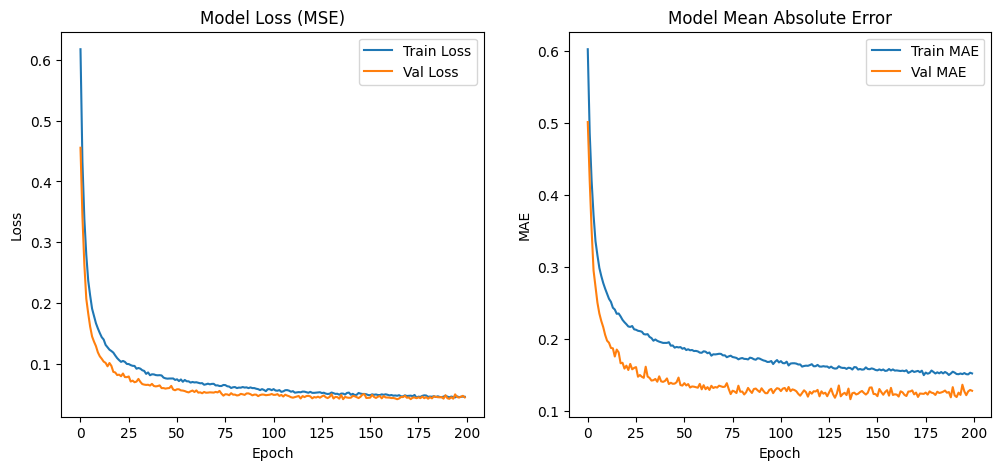

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.show()

In [18]:
import numpy as np

def forward_kinematics(joint_angles, link_lengths):
    """
    Computes the positions of each joint in a simple 3D robotic arm.

    Parameters:
        joint_angles: list or array of 3 angles [theta1, theta2, theta3]
        link_lengths: list or array of link lengths [l1, l2, l3]

    Returns:
        positions: A numpy array of shape (4, 3) where each row is [x, y, z]
                   starting from the base to the end-effector.
    """
    # Base position
    x0, y0, z0 = 0, 0, 0
    positions = [(x0, y0, z0)]

    # First joint: rotates in the XY plane
    theta1 = joint_angles[0]
    x1 = x0 + link_lengths[0] * np.cos(theta1)
    y1 = y0 + link_lengths[0] * np.sin(theta1)
    z1 = z0
    positions.append((x1, y1, z1))

    # Second joint: introduces vertical motion (rotation around y-axis)
    theta2 = joint_angles[1]
    x2 = x1 + link_lengths[1] * np.cos(theta1) * np.cos(theta2)
    y2 = y1 + link_lengths[1] * np.sin(theta1) * np.cos(theta2)
    z2 = z1 + link_lengths[1] * np.sin(theta2)
    positions.append((x2, y2, z2))

    # Third joint: adds another rotation (around y-axis) for demonstration
    theta3 = joint_angles[2]
    x3 = x2 + link_lengths[2] * np.cos(theta1) * np.cos(theta2 + theta3)
    y3 = y2 + link_lengths[2] * np.sin(theta1) * np.cos(theta2 + theta3)
    z3 = z2 + link_lengths[2] * np.sin(theta2 + theta3)
    positions.append((x3, y3, z3))

    return np.array(positions)

In [19]:
# Generate a sequence of NN predictions from the test set (assuming at least 100 samples are present)
num_frames = 100
angles_sequence_nn = []

for i in range(num_frames):
    # Get one test sample (reshape as a single-sample batch)
    x_input = X_test_scaled[i].reshape(1, -1)
    # Predict the joint angles (scaled)
    pred_scaled = model.predict(x_input)
    # Inverse-transform to get back to the original scale
    pred = scaler_y.inverse_transform(pred_scaled)[0]
    # Use only the first three joint angles for our 3D demonstration
    joint_angles = pred[:3]
    angles_sequence_nn.append(joint_angles)

angles_sequence_nn = np.array(angles_sequence_nn)
print("NN-generated angles sequence shape:", angles_sequence_nn.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━

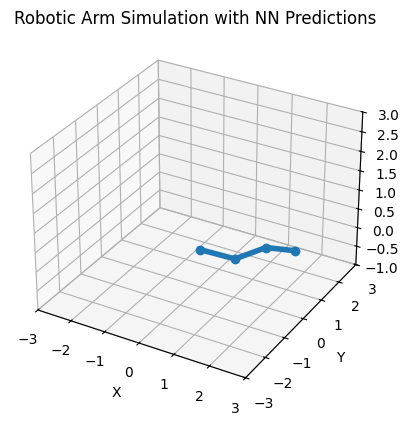

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Define the arm's link lengths (adjust these for your arm's geometry)
link_lengths = [1.0, 1.0, 0.8]

# Set up the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-1, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("Robotic Arm Simulation with NN Predictions")

# Initialize line for the arm (we'll update its data in the animation)
line, = ax.plot([], [], [], 'o-', lw=4)

# Initialization function for the animation
def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return (line,)

# Animation function which updates the arm position using NN predictions
def animate(i):
    joint_angles = angles_sequence_nn[i]   # Get predicted joint angles for frame i
    positions = forward_kinematics(joint_angles, link_lengths)
    xs = positions[:, 0]
    ys = positions[:, 1]
    zs = positions[:, 2]

    line.set_data(xs, ys)
    line.set_3d_properties(zs)
    return (line,)

# # Create the animation
# ani = animation.FuncAnimation(fig, animate, frames=len(angles_sequence_nn),
#                               init_func=init, blit=True, interval=50)

# plt.show()


from IPython.display import HTML
from matplotlib import rc

rc('animation', html='jshtml')  # or use 'html5' if preferred

ani = animation.FuncAnimation(fig, animate, frames=len(angles_sequence_nn),
                              init_func=init, blit=True, interval=50)

HTML(ani.to_jshtml())


# from matplotlib.animation import PillowWriter

# # Create the animation
# ani = animation.FuncAnimation(fig, animate, frames=len(angles_sequence_nn),
#                               init_func=init, blit=True, interval=50)

# # Save the animation as a GIF
# ani.save('robotic_arm_200epoch_64batchsize.gif', writer=PillowWriter(fps=20))

In [ ]:
import tkinter as tk
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Ensure this import for 3D plotting

# --- Assume these are already defined from your previous code ---
# model, scaler_X, scaler_y, forward_kinematics, and link_lengths
# For instance, your link_lengths (for our 3-joint demo) are:
link_lengths = [1.0, 1.0, 0.8]

# --- Define the function to simulate the robotic arm configuration ---
def simulate():
    try:
        # Read input values from the UI (convert to float)
        x_val = float(entry_x.get())
        y_val = float(entry_y.get())
        z_val = float(entry_z.get())
        roll_val = float(entry_roll.get())
        pitch_val = float(entry_pitch.get())
        yaw_val = float(entry_yaw.get())
    except ValueError:
        print("Please enter valid numbers.")
        return

    # Create the target input vector; make sure the order matches your model's expected input!
    target_input = np.array([[x_val, y_val, z_val, roll_val, pitch_val, yaw_val]])

    # Normalize the input using the training scaler
    target_input_scaled = scaler_X.transform(target_input)

    # Predict the joint angles using your trained model (model expects a scaled input)
    pred_scaled = model.predict(target_input_scaled)

    # Inverse-transform to obtain original scale joint angles
    pred = scaler_y.inverse_transform(pred_scaled)[0]

    # For the demonstration, we use the first three joint angles for our 3D simulation
    joint_angles = pred[:3]
    print("Predicted joint angles:", joint_angles)

    # Compute the joint positions with forward kinematics
    positions = forward_kinematics(joint_angles, link_lengths)
    xs = positions[:, 0]
    ys = positions[:, 1]
    zs = positions[:, 2]

    # Plot the arm configuration in 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(xs, ys, zs, 'o-', lw=4)
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-1, 3])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Predicted Robotic Arm Configuration")
    plt.show()

# --- Build the Tkinter UI ---
root = tk.Tk()
root.title("Robotic Arm Simulation Input")

# Create labels and entry widgets for each parameter
tk.Label(root, text="X:").grid(row=0, column=0, padx=5, pady=5, sticky='e')
entry_x = tk.Entry(root)
entry_x.grid(row=0, column=1, padx=5, pady=5)

tk.Label(root, text="Y:").grid(row=1, column=0, padx=5, pady=5, sticky='e')
entry_y = tk.Entry(root)
entry_y.grid(row=1, column=1, padx=5, pady=5)

tk.Label(root, text="Z:").grid(row=2, column=0, padx=5, pady=5, sticky='e')
entry_z = tk.Entry(root)
entry_z.grid(row=2, column=1, padx=5, pady=5)

tk.Label(root, text="Roll:").grid(row=3, column=0, padx=5, pady=5, sticky='e')
entry_roll = tk.Entry(root)
entry_roll.grid(row=3, column=1, padx=5, pady=5)

tk.Label(root, text="Pitch:").grid(row=4, column=0, padx=5, pady=5, sticky='e')
entry_pitch = tk.Entry(root)
entry_pitch.grid(row=4, column=1, padx=5, pady=5)

tk.Label(root, text="Yaw:").grid(row=5, column=0, padx=5, pady=5, sticky='e')
entry_yaw = tk.Entry(root)
entry_yaw.grid(row=5, column=1, padx=5, pady=5)

# Add a button that triggers the simulation function
simulate_button = tk.Button(root, text="Simulate", command=simulate)
simulate_button.grid(row=6, column=0, columnspan=2, padx=5, pady=10)

root.mainloop()
